In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
# Import a CSV file
df = pd.read_csv('Netflix Userbase.csv')
#head
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [6]:
#tail
df.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [7]:
#shape
df.shape

(2500, 10)

In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [9]:
#finding missing value
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [10]:
#finding duplicates
df.duplicated().sum()

0

In [11]:
#dtypes
df.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [13]:
#converting the type of dates a datetype
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

In [14]:
df.dtypes

User ID                       int64
Subscription Type            object
Monthly Revenue               int64
Join Date            datetime64[ns]
Last Payment Date    datetime64[ns]
Country                      object
Age                           int64
Gender                       object
Device                       object
Plan Duration                object
dtype: object

In [15]:
#creating a new column containing the subrscription duration=(last payment date-join date)
df['Subscription Duration (Days)'] = (df['Last Payment Date'] - df['Join Date']).dt.days

In [16]:
df.describe()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age,Subscription Duration (Days)
count,2500.00000,2500.000000,2500,2500,2500.000000,2500.000000
mean,1250.50000,12.508400,2022-08-28 18:02:52.800000,2023-07-03 08:54:31.680000,38.795600,308.619200
min,1.00000,10.000000,2021-09-05 00:00:00,2023-06-10 00:00:00,26.000000,8.000000
25%,625.75000,11.000000,2022-07-15 00:00:00,2023-06-29 00:00:00,32.000000,261.000000
50%,1250.50000,12.000000,2022-08-31 00:00:00,2023-07-03 00:00:00,39.000000,307.000000
75%,1875.25000,14.000000,2022-10-17 00:00:00,2023-07-08 00:00:00,45.000000,356.000000
max,2500.00000,15.000000,2023-06-14 00:00:00,2023-07-15 00:00:00,51.000000,655.000000
std,721.83216,1.686851,NaN,NaN,7.171778,63.088172


In [18]:
df.describe(include="object")

,Subscription Type,Country,Gender,Device,Plan Duration
count,2500,2500,2500,2500,2500
unique,3,10,2,4,1
top,Basic,United States,Female,Laptop,1 Month
freq,999,451,1257,636,2500


In [26]:
df['Subscription Type'].nunique()
df['Subscription Type'].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [27]:
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy'],
      dtype=object)

In [28]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [29]:
df['Device'].unique()

array(['Smartphone', 'Tablet', 'Smart TV', 'Laptop'], dtype=object)

In [30]:
df['Plan Duration'].unique()

array(['1 Month'], dtype=object)

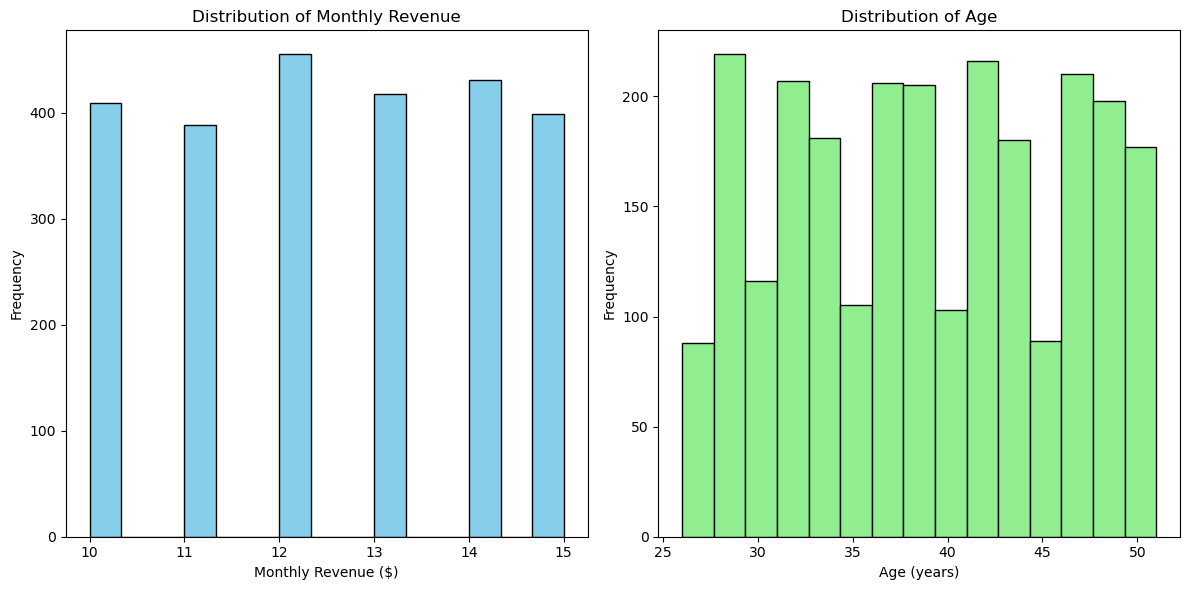

In [31]:
#histogram to understand the distribution
# Plot histograms for Monthly Revenue and Age
plt.figure(figsize=(12, 6))

# Monthly Revenue
plt.subplot(1, 2, 1)
plt.hist(df['Monthly Revenue'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue ($)')
plt.ylabel('Frequency')

# Age
plt.subplot(1, 2, 2)
plt.hist(df['Age'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

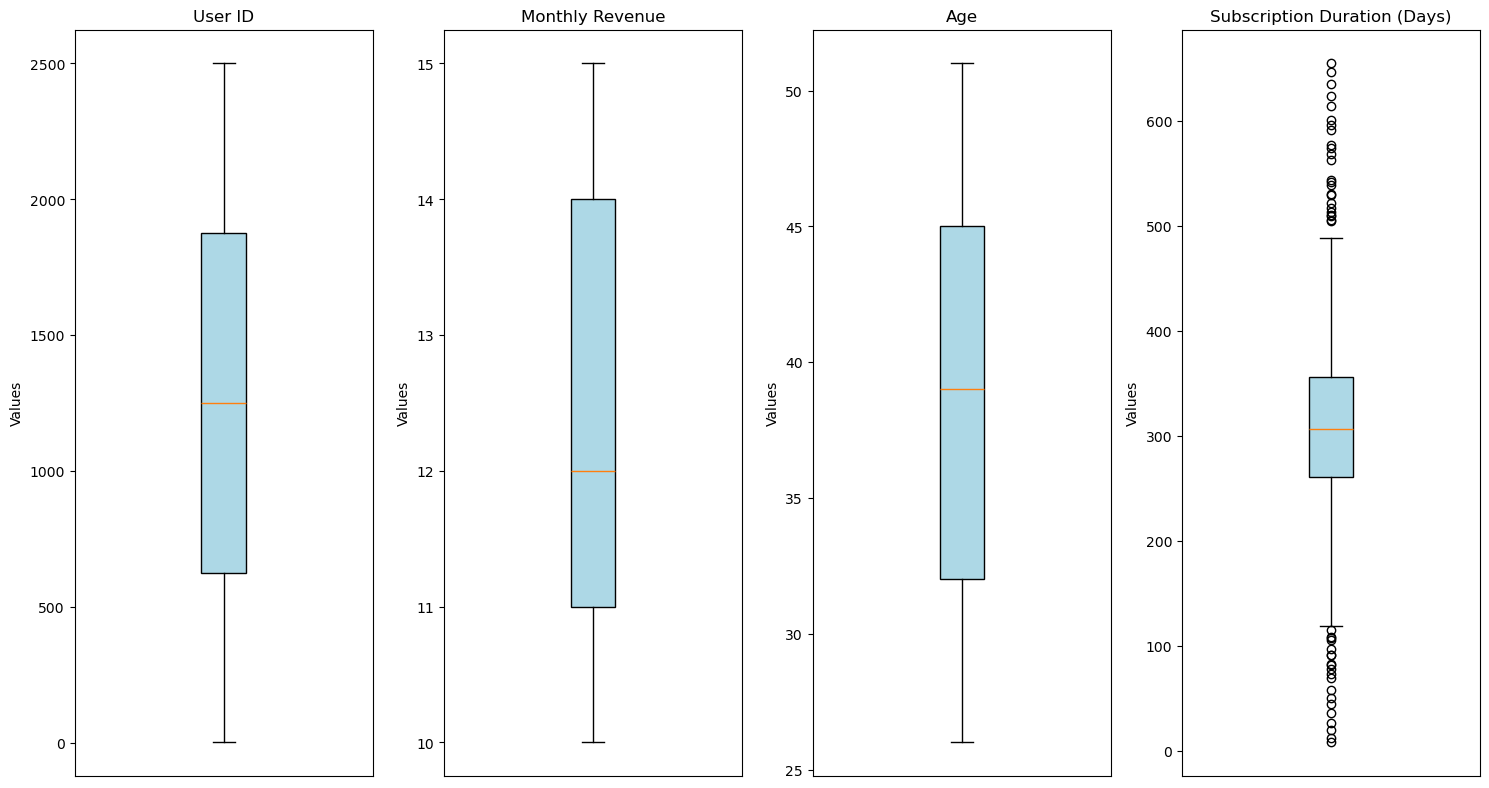

In [32]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns   #or we can do include number

# Create a figure with subplots for each numeric column
plt.figure(figsize=(15, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)  # Create a subplot for each column
    plt.boxplot(df[column], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(column)
    plt.ylabel('Values')
    plt.xticks([])  # Remove x-axis ticks as they're not meaningful for boxplots

plt.tight_layout()
plt.show()

In [34]:
highest_revenue = df['Monthly Revenue'].max()
print("Highest Monthly Revenue:", highest_revenue)

Highest Monthly Revenue: 15


In [36]:
lowest_revenue = df['Monthly Revenue'].min()
print("lowest Monthly Revenue:", lowest_revenue)

lowest Monthly Revenue: 10


In [37]:
highest_paying_country = df.groupby('Country')['Monthly Revenue'].sum().idxmax()
print("Highest Paying Country:", highest_paying_country)

Highest Paying Country: United States


In [38]:
lowest_paying_country = df.groupby('Country')['Monthly Revenue'].sum().idxmin()
print("lowest Paying Country:", lowest_paying_country)

lowest Paying Country: Mexico


In [39]:
df.select_dtypes(include="number").columns

Index(['User ID', 'Monthly Revenue', 'Age', 'Subscription Duration (Days)'], dtype='object')

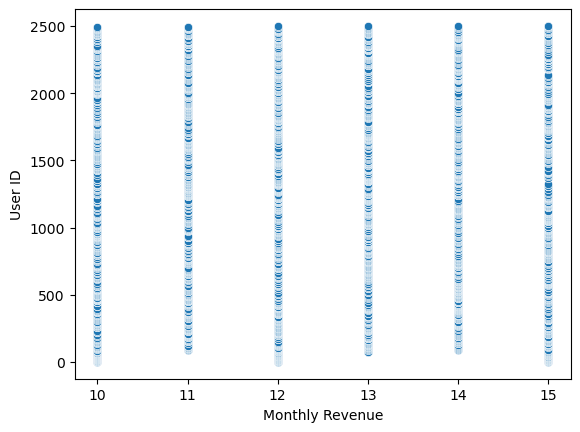

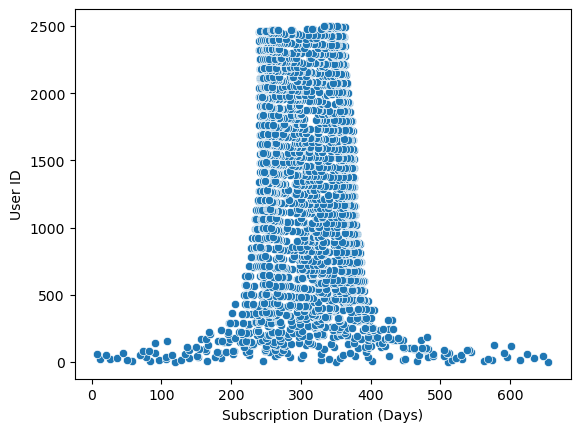

ValueError: Could not interpret value `age` for parameter `x`

In [43]:
#scatter plot to understand the relationship
for i in ['Monthly Revenue','Subscription Duration (Days)','age']:
    sns.scatterplot(data=df,x=i,y='User ID')
    plt.show()

In [44]:
correlation = df[['Age', 'Monthly Revenue']].corr()
print("Correlation Between Age and Monthly Revenue:\n", correlation)

Correlation Between Age and Monthly Revenue:
                       Age  Monthly Revenue
Age              1.000000        -0.021143
Monthly Revenue -0.021143         1.000000


<Axes: >

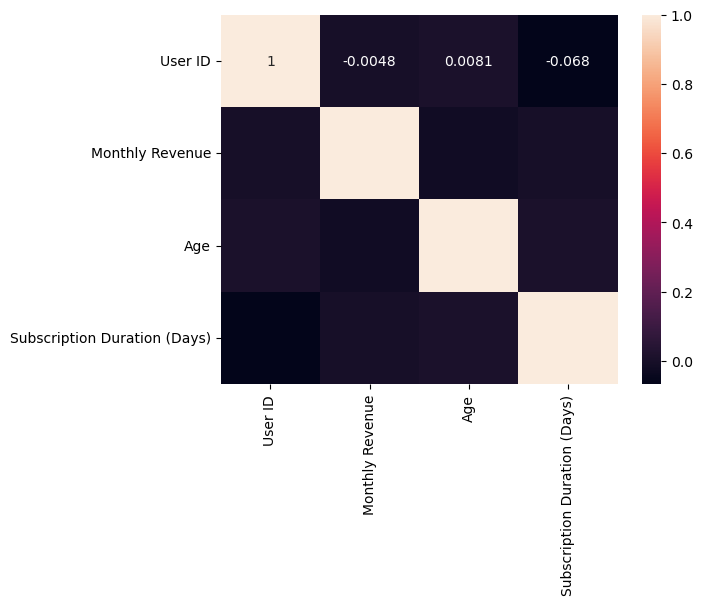

In [49]:
#correlation with heatmap
s=df.select_dtypes(include="number").corr()
sns.heatmap(s,annot=True)

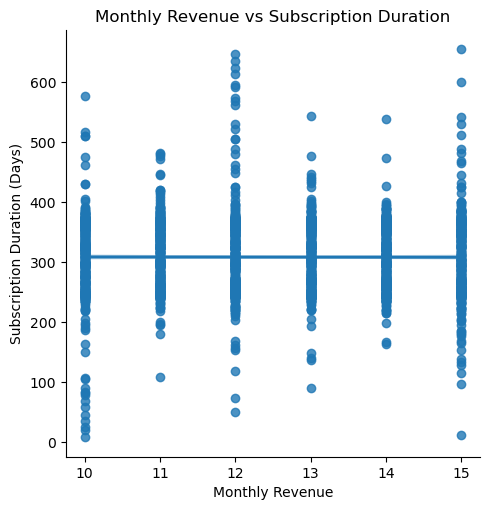

In [51]:
# Scatter plot to explore the relationship between Monthly Revenue and Subscription Duration
sns.lmplot(x='Monthly Revenue', y='Subscription Duration (Days)', data=df)
plt.title('Monthly Revenue vs Subscription Duration')
plt.show()

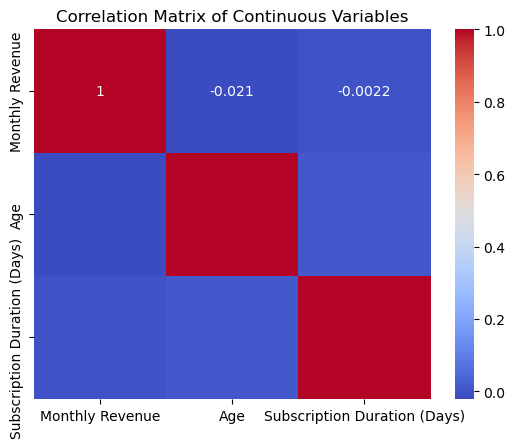

In [52]:
# Calculate the correlation matrix between the continuous variables
correlation_matrix =df[['Monthly Revenue', 'Age', 'Subscription Duration (Days)']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

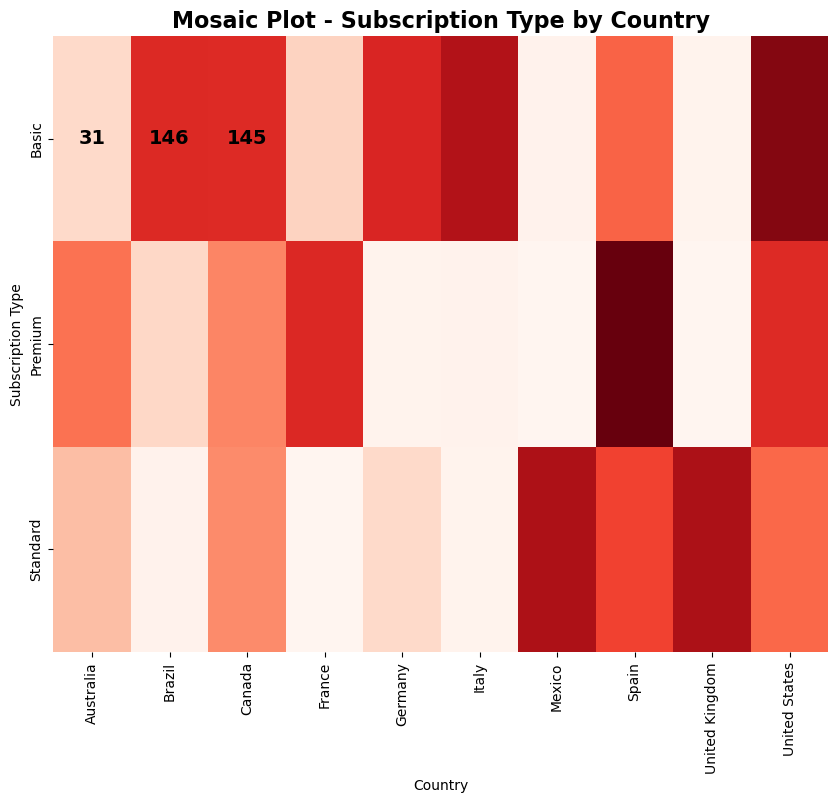

In [54]:
# Create a contingency table for Subscription Type and Country
contingency_table = pd.crosstab(df['Subscription Type'], df['Country'])

# Visualize the contingency table as a heatmap with customizations
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
sns.heatmap(contingency_table, cmap="Reds", annot=True, fmt='g', cbar=False, annot_kws={"size": 14, "weight": "bold", "color": "black"})
plt.title("Mosaic Plot - Subscription Type by Country", fontsize=16, weight='bold')  # Title with larger font
plt.show()


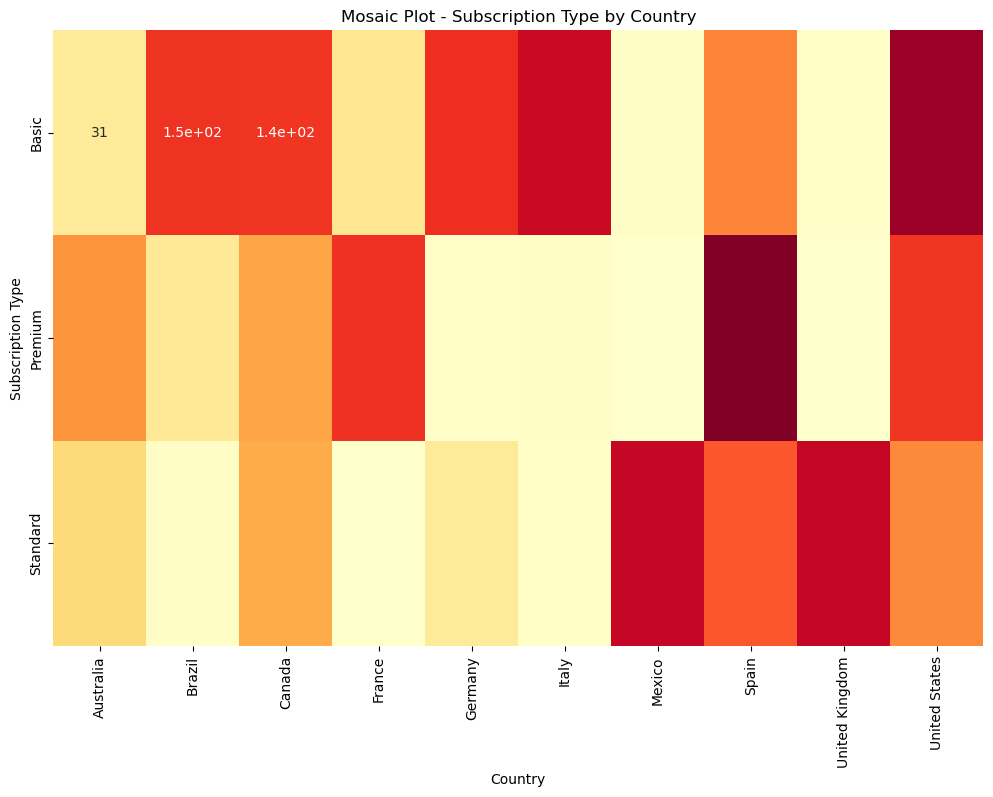

In [55]:
# Create a contingency table for Subscription Type and Country
contingency_table = pd.crosstab(df['Subscription Type'], df['Country'])

# Visualize the contingency table as a heatmap
plt.figure(figsize=(12, 8))  # Increase figure size
sns.heatmap(contingency_table, cmap="YlOrRd", annot=True, cbar=False)
plt.title("Mosaic Plot - Subscription Type by Country")
plt.xlabel("Country")
plt.ylabel("Subscription Type")
plt.show()

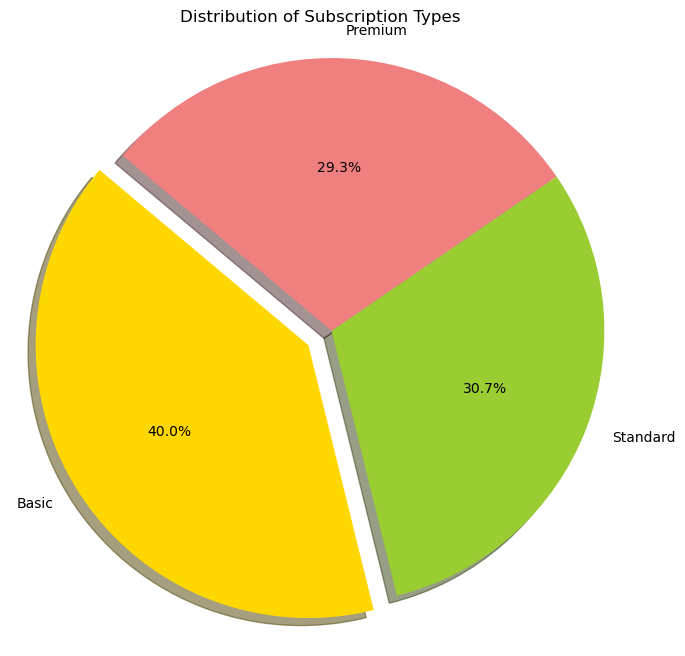

In [57]:
# Calculate the proportions of each subscription type
sizes = df['Subscription Type'].value_counts()
labels = sizes.index
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']  # Customize colors

# Explode the largest category for emphasis
explode = [0.1 if i == sizes.max() else 0 for i in sizes]

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add title
plt.title('Distribution of Subscription Types')

# Display the pie chart
plt.show()

C:\Users\micro\anacondaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


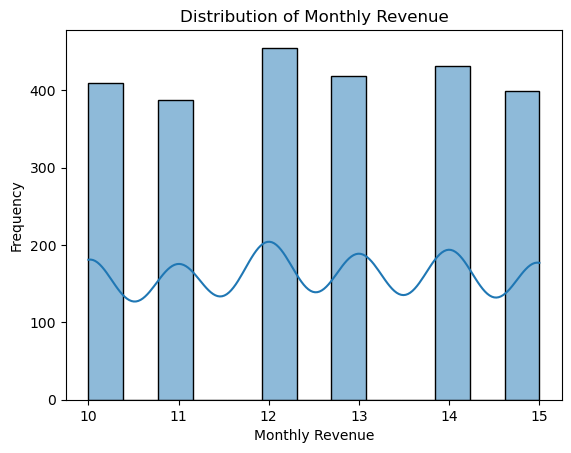

In [58]:
sns.histplot(df['Monthly Revenue'], kde=True)  # kde=True adds a kernel density estimate line
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

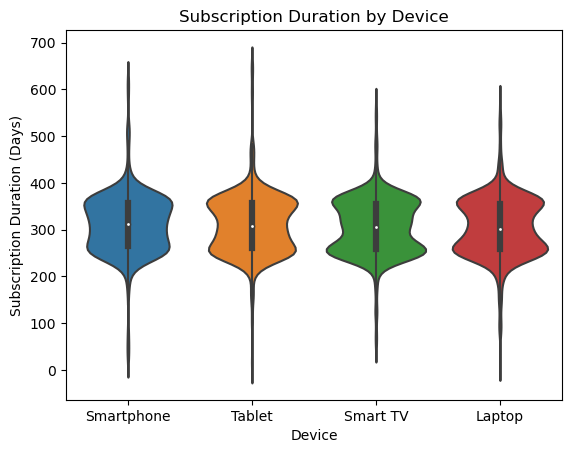

In [59]:
# Violin plot to explore the distribution of Subscription Duration across different devices
sns.violinplot(x='Device', y='Subscription Duration (Days)', data=df)
plt.title('Subscription Duration by Device')
plt.show()

C:\Users\micro\anacondaa\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 800x600 with 0 Axes>

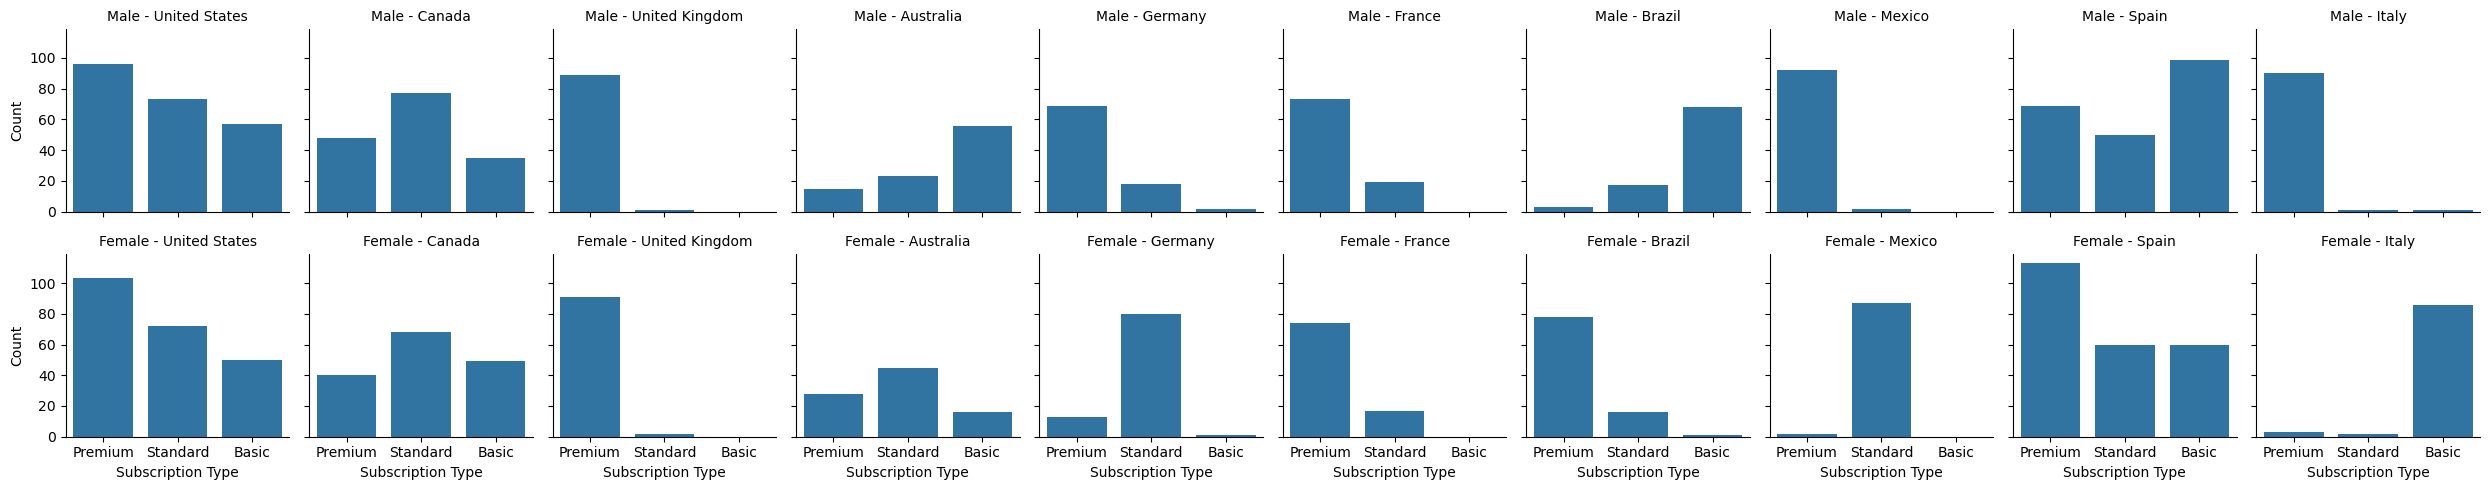

In [61]:
plt.figure(figsize=(8, 6))
g = sns.FacetGrid(df, row="Gender", col="Country", height=2.5)
g.map(sns.countplot, "Subscription Type")
g.set_titles("{row_name} - {col_name}")
g.set_axis_labels("Subscription Type", "Count")
plt.show()

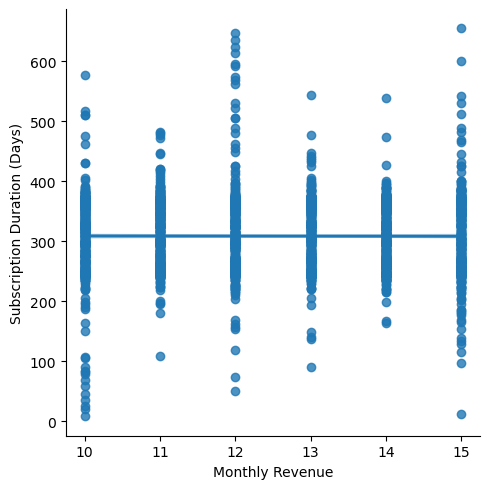

In [63]:
sns.lmplot(x='Monthly Revenue', y='Subscription Duration (Days)', data=df)

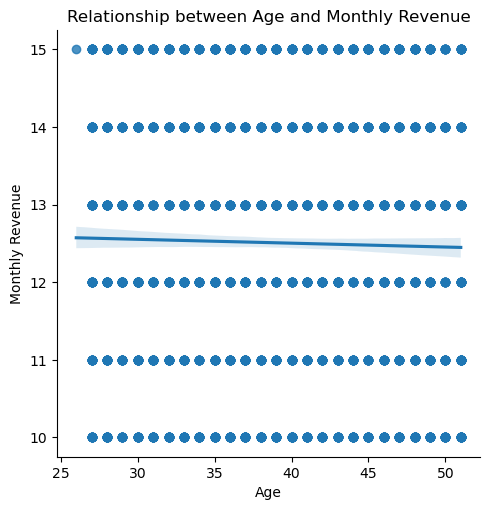

In [64]:
sns.lmplot(x='Age', y='Monthly Revenue', data=df)
plt.title('Relationship between Age and Monthly Revenue')
plt.xlabel('Age')
plt.ylabel('Monthly Revenue')
plt.show()

In [74]:
# Ensure 'Join Date' and 'Last Payment Date' are in datetime format
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# Convert 'Join Date' and 'Last Payment Date' to the number of days since they occurred
current_date = pd.to_datetime('today')

df['Join Date'] = (current_date - df['Join Date']).dt.days
df['Last Payment Date'] = (current_date - df['Last Payment Date']).dt.days


In [84]:
#Encoding (for categorical variables)
#Normalization and Standardization (for numerical variables)
#Imputation (for missing values, if any)
#Feature Selection/Extraction (optional, based on your needs)
#Pipelines (to combine preprocessing and model fitting steps)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       2500 non-null   int64  
 1   Monthly Revenue               2500 non-null   float64
 2   Join Date                     2500 non-null   int64  
 3   Last Payment Date             2500 non-null   int64  
 4   Age                           2500 non-null   float64
 5   Plan Duration                 2500 non-null   object 
 6   Subscription Duration (Days)  2500 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 136.8+ KB


In [87]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Apply OneHotEncoding to the 'Plan Duration' column
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output 
plan_duration_encoded = encoder.fit_transform(df[['Plan Duration']])

# Convert the result into a DataFrame and join with the original dataframe
plan_duration_df = pd.DataFrame(plan_duration_encoded, columns=encoder.get_feature_names_out(['Plan Duration']))
df = df.join(plan_duration_df)


In [88]:
from sklearn.preprocessing import OrdinalEncoder

# Apply OrdinalEncoding to the 'Plan Duration' column
encoder = OrdinalEncoder()
df['Plan Duration'] = encoder.fit_transform(df[['Plan Duration']])


In [90]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select columns to scale
columns_to_scale = ['Age', 'Monthly Revenue', 'Join Date', 'Last Payment Date']

# MinMax Normalization
scaler_minmax = MinMaxScaler()
df[columns_to_scale] = scaler_minmax.fit_transform(df[columns_to_scale])

# Standardization (Z-score scaling)
scaler_standard = StandardScaler()
df[columns_to_scale] = scaler_standard.fit_transform(df[columns_to_scale])

# Optional: Verify the transformation by checking the first few rows
print(df[columns_to_scale].head())



        Age  Monthly Revenue  Join Date  Last Payment Date
0 -1.505590        -1.487328        0.0                0.0
1 -0.529347         1.477367        0.0                0.0
2  0.446896        -0.301450        0.0                0.0
3  1.702066        -0.301450        0.0                0.0
4 -0.808274        -1.487328        0.0                0.0
